C:\Users\radif\AppData\Local\Temp\ipykernel_22352\3443538590.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


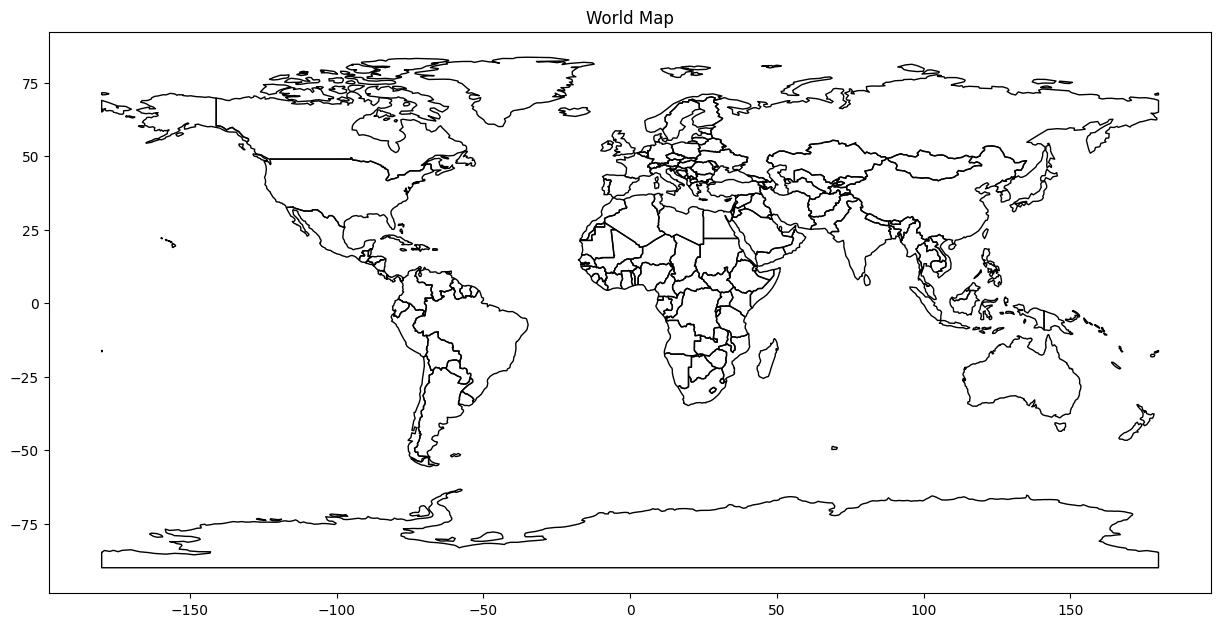

Formatted Start Date: 10/10/2020
Formatted End Date: 10/10/2022


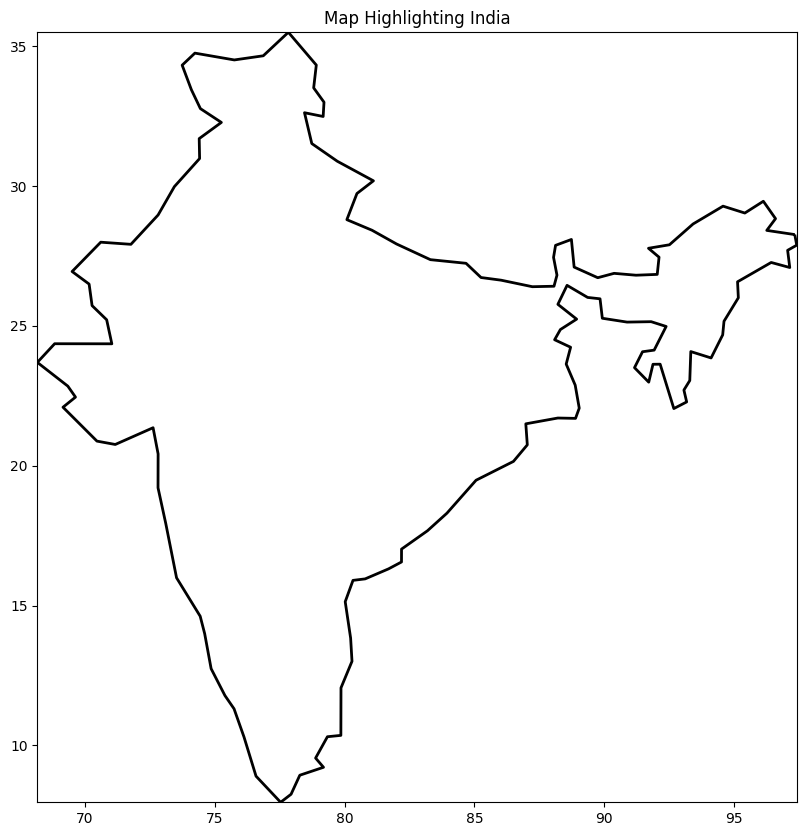

In [11]:
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt


def convert_format_date(input_date, input_format, output_format):
    if not input_date.strip():  
        return "Not provided"
    date_obj = datetime.strptime(input_date, input_format)
    formatted_date = date_obj.strftime(output_format)
    return formatted_date


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fig1, ax1 = plt.subplots(1, 1, figsize=(15, 10))


world.boundary.plot(ax=ax1, linewidth=1, color='black')
plt.title("World Map")
plt.pause(0.1)  


start_date = input("Enter the start date (dd mm yyyy): ")
end_date = input("Enter the end date (dd mm yyyy): ")
user_country = input("Enter the country: ").strip()  


input_format = "%d %m %Y"
output_format = "%d/%m/%Y"


start_date_formatted = convert_format_date(start_date, input_format, output_format)
end_date_formatted = convert_format_date(end_date, input_format, output_format)
print(f"Formatted Start Date: {start_date_formatted}")
print(f"Formatted End Date: {end_date_formatted}")


fig2, ax2 = plt.subplots(1, 1, figsize=(15, 10))


if user_country:  
    specific_country = world[world['name'].str.strip() == user_country] 
    
    if not specific_country.empty:
        
        specific_country.boundary.plot(ax=ax2, linewidth=2, color='black')
        
      
        plt.title(f"Map Highlighting {user_country}")
        
        
        ax2.set_xlim(specific_country.total_bounds[0], specific_country.total_bounds[2])
        ax2.set_ylim(specific_country.total_bounds[1], specific_country.total_bounds[3])
    else:
        print(f"Country '{user_country}' not found in the dataset.")
        world.boundary.plot(ax=ax2, linewidth=1, color='black')
        plt.title("World Map")
else:
    world.boundary.plot(ax=ax2, linewidth=1, color='black')
    plt.title("World Map")


plt.show()
